In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train', 'train.csv', 'sample_submission.csv']


In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
print(os.listdir("../input"))

import numpy as np

Using TensorFlow backend.


['test', 'train', 'train.csv', 'sample_submission.csv']


In [3]:
train_dir="../input/train/train"
test_dir="../input/test/test"
train=pd.read_csv('../input/train.csv')

df_test=pd.read_csv('../input/sample_submission.csv')

In [4]:
train.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [5]:
train.has_cactus=train.has_cactus.astype(str)

In [6]:
train['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [7]:
print('Train shape = {} , \n Test shape = {}'.format(train.shape,len(os.listdir('../input/test/test'))))

Train shape = (17500, 2) , 
 Test shape = 4000


1


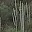

In [8]:
print(train.iloc[900,1])
Image(os.path.join("../input/train/train",train.iloc[900,0]),width=250,height=250)

In [9]:
datagen=ImageDataGenerator(rescale=1./255)
batch_size=150

In [10]:
'''
dataframe value : Dataframe having meaningful data (file name, class columns are a must)
directory value : The path to the parent directory containing all images.
x_col value : which will be the name of column(in dataframe) having file names
y_col value : which will be the name of column(in dataframe) having class/label
'''

'\ndataframe value : Dataframe having meaningful data (file name, class columns are a must)\ndirectory value : The path to the parent directory containing all images.\nx_col value : which will be the name of column(in dataframe) having file names\ny_col value : which will be the name of column(in dataframe) having class/label\n'

In [11]:
train_generator=datagen.flow_from_dataframe(dataframe=train[:15001],directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                            target_size=(150,150))


validation_generator=datagen.flow_from_dataframe(dataframe=train[15000:],directory=train_dir,x_col='id',
                                                y_col='has_cactus',class_mode='binary',batch_size=50,
                                                target_size=(150,150))


Found 15001 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [12]:
type(train_generator)

keras_preprocessing.image.dataframe_iterator.DataFrameIterator

In [13]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [15]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.rmsprop(),metrics=['acc'])

In [16]:
epochs=10
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 34s 342ms/step - loss: 0.4096 - acc: 0.8269 - val_loss: 0.3404 - val_acc: 0.8676
Epoch 2/10
100/100 [==============================] - 21s 210ms/step - loss: 0.2119 - acc: 0.9100 - val_loss: 0.1439 - val_acc: 0.9388
Epoch 3/10
100/100 [==============================] - 21s 206ms/step - loss: 0.1453 - acc: 0.9417 - val_loss: 0.1170 - val_acc: 0.9456
Epoch 4/10
100/100 [==============================] - 21s 211ms/step - loss: 0.1196 - acc: 0.9508 - val_loss: 0.4261 - val_acc: 0.8884
Epoch 5/10
100/100 [==============================] - 20s 204ms/step - loss: 0.0972 - acc: 0.9623 - val_loss: 0.0761 - val_acc: 0.9736
Epoch 6/10
100/100 [==============================] - 21s 205ms/step - loss: 0.0835 - acc: 0.9681 - val_loss: 0.1308 - val_acc: 0.9592
Epoch 7/10
100/100 [==============================] - 21s 210ms/step - loss: 0.0759 - acc: 0.9752 - val_loss: 0.0772 - val_acc: 0.9700
Epoch 8/10
100/100 [==============================] - 2

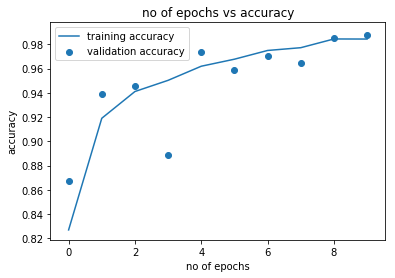

In [17]:
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

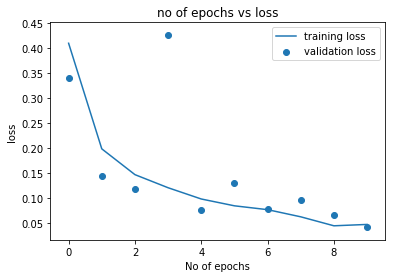

In [18]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,epochs)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

In [19]:
model_vg=VGG16(weights='imagenet',include_top=False)
model_vg.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool

In [20]:
def extract_features(directory,samples,df):
    features=np.zeros(shape=(samples,4,4,512))
    labels=np.zeros(shape=(samples))
    generator=datagen.flow_from_dataframe(dataframe=df,directory=directory,x_col='id',
                                            y_col='has_cactus',class_mode='other',batch_size=batch_size,
                                            target_size=(150,150))
    i=0
    for input_batch,label_batch in generator:
        feature_batch=model_vg.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size]=feature_batch
        labels[i*batch_size:(i+1)*batch_size]=label_batch
        i+=1
        if(i*batch_size>samples):
            break
    return(features,labels)

train.has_cactus=train.has_cactus.astype(int)
features,labels=extract_features(train_dir,17500,train)
train_features=features[:15001]
train_labels=labels[:15001]

validation_features=features[15000:]
validation_labels=labels[15000:]

Found 17500 validated image filenames.


In [21]:
#df_test.has_cactus=df_test.has_cactus.astype(str)
test_features,test_labels=extract_features(test_dir,4000,df_test)

Found 4000 validated image filenames.


In [22]:
train_features=train_features.reshape((15001,4*4*512))
validation_features=validation_features.reshape((2500,4*4*512))

test_features=test_features.reshape((4000,4*4*512))

In [23]:
model=models.Sequential()
model.add(layers.Dense(212,activation='relu',kernel_regularizer=regularizers.l1_l2(.001),input_dim=(4*4*512)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))

In [24]:
model.compile(optimizer=optimizers.rmsprop(),loss='binary_crossentropy',metrics=['acc'])

In [25]:
history=model.fit(train_features,train_labels,epochs=30,batch_size=15,validation_data=(validation_features,validation_labels))

Train on 15001 samples, validate on 2500 samples
Epoch 1/30
15001/15001 [==============================] - 5s 337us/step - loss: 1.4505 - acc: 0.8961 - val_loss: 1.1031 - val_acc: 0.9596
Epoch 2/30
15001/15001 [==============================] - 5s 308us/step - loss: 1.1378 - acc: 0.9326 - val_loss: 1.0701 - val_acc: 0.9676
Epoch 3/30
15001/15001 [==============================] - 5s 303us/step - loss: 1.1246 - acc: 0.9339 - val_loss: 1.8350 - val_acc: 0.6544
Epoch 4/30
15001/15001 [==============================] - 5s 304us/step - loss: 1.1126 - acc: 0.9387 - val_loss: 1.0633 - val_acc: 0.9572
Epoch 5/30
15001/15001 [==============================] - 5s 302us/step - loss: 1.1087 - acc: 0.9367 - val_loss: 1.0385 - val_acc: 0.9688
Epoch 6/30
15001/15001 [==============================] - 5s 301us/step - loss: 1.1025 - acc: 0.9399 - val_loss: 1.0826 - val_acc: 0.9488
Epoch 7/30
15001/15001 [==============================] - 4s 298us/step - loss: 1.1000 - acc: 0.9389 - val_loss: 1.0656 - v

In [26]:
y_pre=model.predict_proba(test_features)

In [27]:
df=pd.DataFrame({'id':df_test['id'] })
df['has_cactus']=y_pre
df.to_csv("submission.csv",index=False)

In [28]:
df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.999934
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.999995
2,001ee6d8564003107853118ab87df407.jpg,0.987823
3,002e175c3c1e060769475f52182583d0.jpg,0.997876
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.999977


In [29]:
pwd

'/kaggle/working'

In [30]:
import base64
from IPython.display import HTML
# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


# create a link to download the dataframe
create_download_link(df)
